In [1]:
library(coda)

library(rstan)
rstan_options(auto_write = TRUE)
options(mc.cores = parallel::detectCores())

Loading required package: StanHeaders


rstan version 2.32.6 (Stan version 2.32.2)


For execution on a local, multicore CPU with excess RAM we recommend calling
options(mc.cores = parallel::detectCores()).
To avoid recompilation of unchanged Stan programs, we recommend calling
rstan_options(auto_write = TRUE)
For within-chain threading using `reduce_sum()` or `map_rect()` Stan functions,
change `threads_per_chain` option:
rstan_options(threads_per_chain = 1)



Attaching package: ‘rstan’


The following object is masked from ‘package:coda’:

    traceplot




**Gaia Volpi, ID = 2107759**

## Esercizio 1

Ladislaus Josephovich Bortkiewicz was a Russian economist and statistician. He noted that the Poisson distribution can be very useful in applied statistics when describing low-frequency events in a large population. In a famous example he showed that the number of deaths by horse kick
among the Prussian army follows the Poisson distribution.

Considering the following two sets of observations taken over a fixed large time interval in two different corps:

  | y death soldiers | 0   | 1   | 2   | 3  | 4  | ≥5 |
  |---------------|-----|-----|-----|----|----|-----|
  | n₁ observations | 109 | 65  | 22  | 3  | 1  | 0   |
  | n₂ observations | 144 | 91  | 32  | 11 | 2  | 0   |

1)  Assuming a uniform prior, compute and plot the posterior distribution for $\mu$, the death rate over
  the measurement time. Determine the posterior mean, median and variance, and compute the 95%
  credibility interval.

We assume as prior a uniform distribution: gamma ($\alpha_{p} = 1$, $\beta_{p} = 0$). The posterior distribution is then another gamma distribution with parameters $\alpha = \alpha_{p}+ \sum y$ and $\beta = \beta_{p}+n$, with y number of observed events and n total number of observations.

In [2]:
# data
y1 = c(rep(0,109), rep(1,65), rep(2,22), rep(3,3), rep(4,1))
y2 = c(rep(0,144), rep(1,91), rep(2,32), rep(3,11), rep(4,2))

mu = seq(0, 4, length.out = 201)

# function to obtain the parameters of the posterior distribution
gamma.param = function(alpha.p, beta.p, y) {
    alpha = alpha.p + sum(y)
    beta = beta.p + length(y)
    list(alpha=alpha, beta=beta)
}

# function to find mean, variance and median of the posterior distribution
gamma.stat = function(alpha, beta) {
    mean = alpha / beta
    median = qgamma(0.5, alpha, beta)
    var = alpha / beta^2
    CI = qgamma(c(0.025, 0.975), alpha, beta)
    list(mean = mean, median = median, var = var, CI=CI)
}

Corps 1:
 Mean: 0.615, Median: 0.613, Variance: 0.0031 
 95% Credibility Interval: ( 0.5111251 , 0.7283408 )

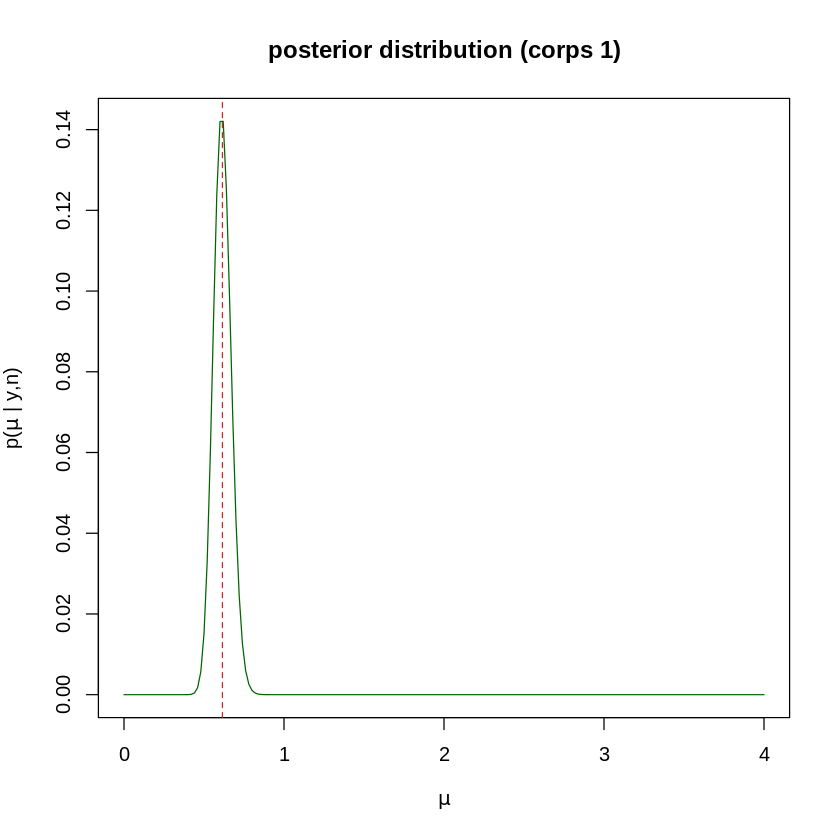

In [3]:
param1 = gamma.param(1,0,y1)
p1.star = dgamma(mu, param1$alpha, param1$beta)
p1.post = p1.star / sum(p1.star)

stat1 = gamma.stat(param1$alpha, param1$beta)

plot(mu, p1.post, type = "l", main = "posterior distribution (corps 1)", xlab = expression(mu), 
     ylab = expression(paste("p(", mu, " | ", y, ',', n, ")")), col='dark green')
abline(v=stat1$mean, col='firebrick3',lty=2)

cat("Corps 1:\n")
cat(sprintf(" Mean: %.3f, Median: %.3f, Variance: %.4f \n", stat1$mean, stat1$median, stat1$var))
cat(" 95% Credibility Interval: (", stat1$CI[1], ",", stat1$CI[2], ")")

Corps 2:
 Mean: 0.704, Median: 0.702, Variance: 0.0025 
 95% Credibility Interval: ( 0.6087487 , 0.805157 )

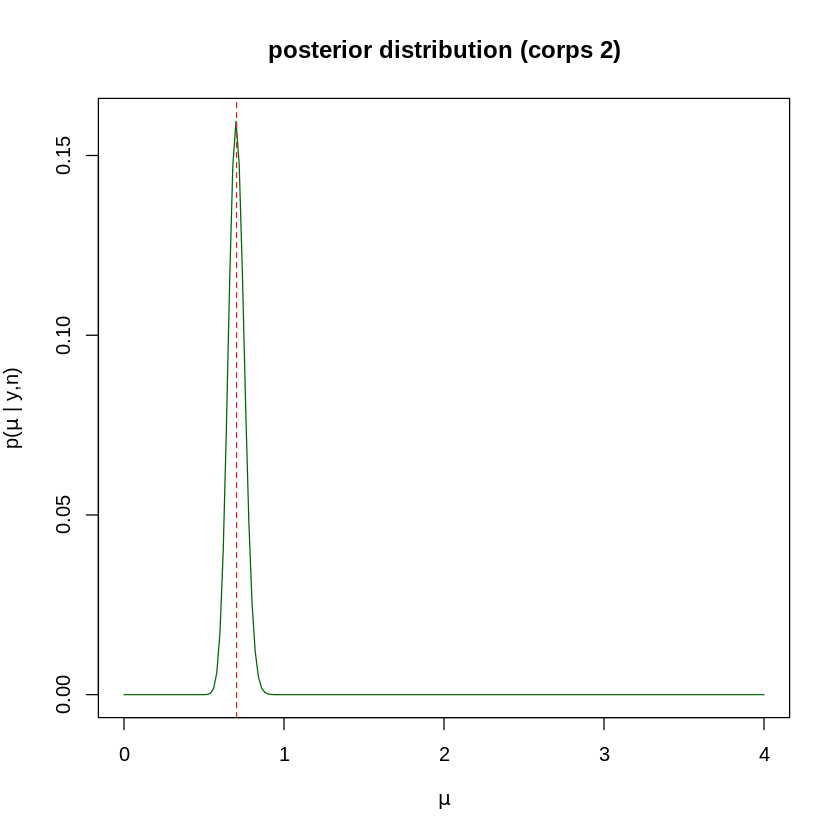

In [4]:
param2 = gamma.param(1,0,y2)
p2.star = dgamma(mu, param2$alpha, param2$beta)
p2.post = p2.star / sum(p2.star)

stat2 = gamma.stat(param2$alpha, param2$beta)

plot(mu, p2.post, type = "l", main = "posterior distribution (corps 2)", xlab = expression(mu), 
     ylab = expression(paste("p(", mu, " | ", y, ',', n, ")")), col='dark green')
abline(v=stat2$mean, col='firebrick3',lty=2)

cat("Corps 2:\n")
cat(sprintf(" Mean: %.3f, Median: %.3f, Variance: %.4f \n", stat2$mean, stat2$median, stat2$var))
cat(" 95% Credibility Interval: (", stat2$CI[1], ",", stat2$CI[2], ")")

2) Assuming now a Jeffreys' prior (g(λ) ∝ 1/√λ , with λ > 0), compute and plot the posterior distribution for λ and the death rate over the measurement time. Determine the posterior mean, median and variance, and compute the 95% credibility interval.

We assume a Jeffreys' prior: gamma ($\alpha_{p} = 1/2$, $\lambda_{p} = 0$). The posterior distribution is then another gamma distribution with parameters $\alpha = \alpha_{p}+ \sum y$ and $\beta = \beta_{p}+n$, with y number of observed events and n total number of observations.

Corps 1:
 Mean: 0.613, Median: 0.611, Variance: 0.0031 
 95% Credibility Interval: ( 0.5088464 , 0.7256196 )

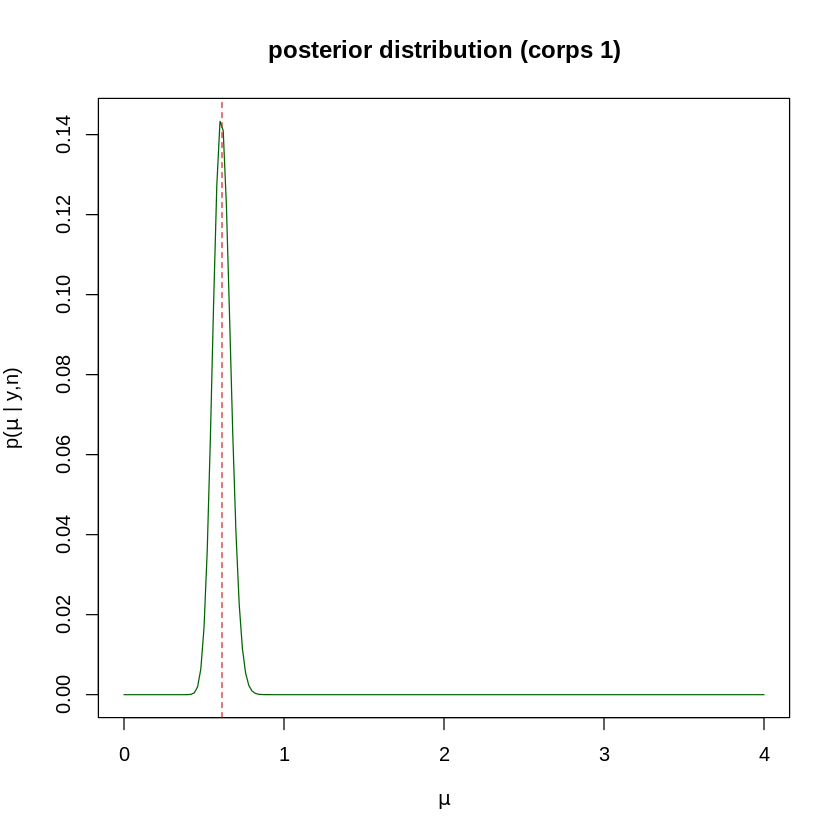

In [5]:
param1 = gamma.param(1/2,0,y1)
p1.star = dgamma(mu, param1$alpha, param1$beta)
p1.post = p1.star / sum(p1.star)

stat1 = gamma.stat(param1$alpha, param1$beta)

plot(mu, p1.post, type = "l", main = "posterior distribution (corps 1)", xlab = expression(mu), 
     ylab = expression(paste("p(", mu, " | ", y, ',', n, ")")), col='dark green')
abline(v=stat1$mean, col='firebrick3',lty=2)

cat("Corps 1:\n")
cat(sprintf(" Mean: %.3f, Median: %.3f, Variance: %.4f \n", stat1$mean, stat1$median, stat1$var))
cat(" 95% Credibility Interval: (", stat1$CI[1], ",", stat1$CI[2], ")")

Corps 2:
 Mean: 0.702, Median: 0.701, Variance: 0.0025 
 95% Credibility Interval: ( 0.6070878 , 0.8032465 )

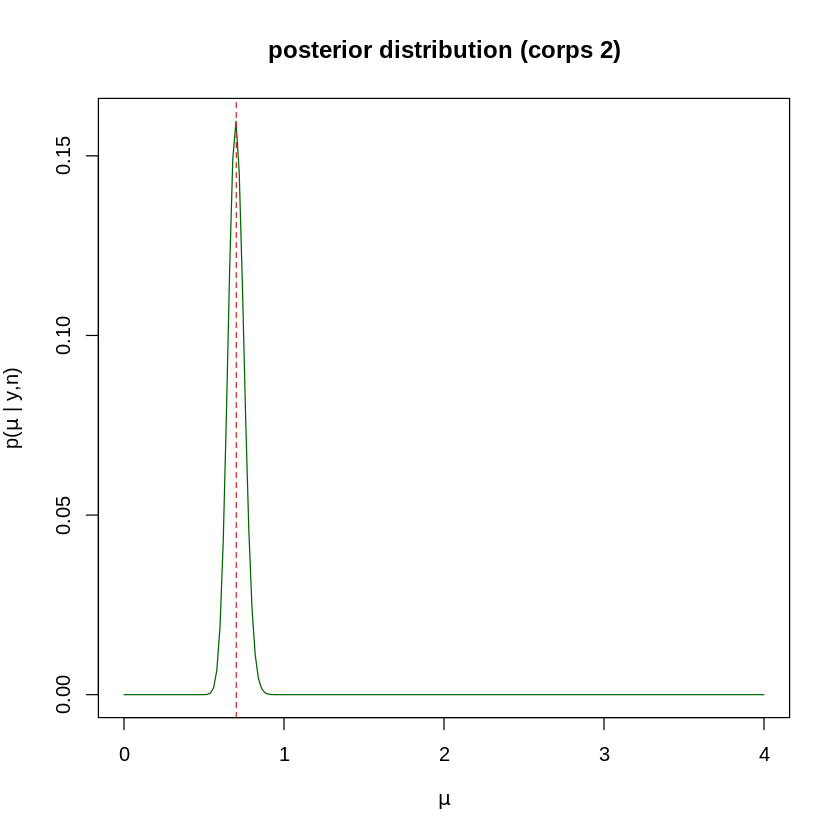

In [6]:
param2 = gamma.param(1/2,0,y2)
p2.star = dgamma(mu, param2$alpha, param2$beta)
p2.post = p2.star / sum(p2.star)

stat2 = gamma.stat(param2$alpha, param2$beta)

plot(mu, p2.post, type = "l", main = "posterior distribution (corps 2)", xlab = expression(mu), 
     ylab = expression(paste("p(", mu, " | ", y, ',', n, ")")), col='dark green')
abline(v=stat2$mean, col='firebrick3',lty=2)

cat("Corps 2:\n")
cat(sprintf(" Mean: %.3f, Median: %.3f, Variance: %.4f \n", stat2$mean, stat2$median, stat2$var))
cat(" 95% Credibility Interval: (", stat2$CI[1], ",", stat2$CI[2], ")")

## Esercizio 2

Solve Exercise 1 using a Markov Chain Monte Carlo using stan.

In [7]:
model.string = "
data {
  int<lower=0> N;  
  int<lower=0> y[N];  
}
parameters {
  real<lower=0> mu;  
}
model {
    mu ~ uniform(0,4);
    y ~ poisson(mu);
}
"


Iterations = 1:800
Thinning interval = 1 
Number of chains = 3 
Sample size per chain = 800 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

          Mean      SD Naive SE Time-series SE
mu      0.6127 0.05482 0.001119       0.001822
lp__ -183.2880 0.71563 0.014608       0.024680

2. Quantiles for each variable:

          2.5%       25%       50%       75%     97.5%
mu      0.5107    0.5764    0.6117    0.6477    0.7243
lp__ -185.1961 -183.4589 -183.0073 -182.8446 -182.7950



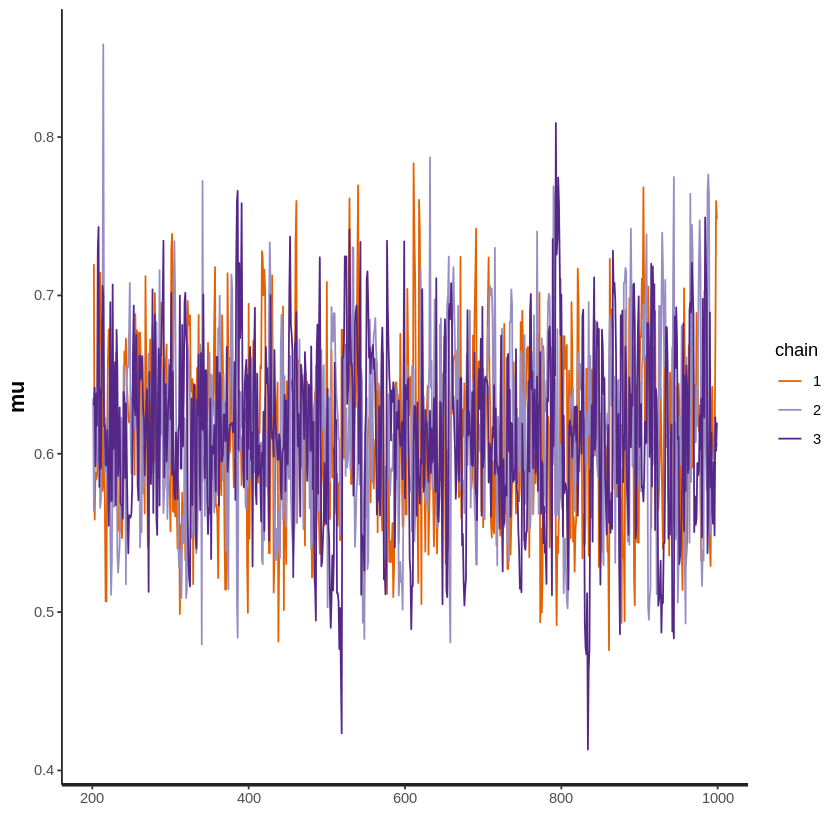

In [8]:
data1 = list(y = y1 , N = length(y1))

model1 = stan_model(model_code=model.string)
fit1 = sampling(object=model1 , data=data1 , chains=3 , iter=1000 , warmup=200 , thin=1, refresh=0)

rstan::traceplot(fit1 ,pars=c("mu"))

mcmc1 = mcmc.list(lapply(1:ncol(fit1), function(x) { mcmc(as.array(fit1)[,x ,]) }))
print(summary(mcmc1))


Iterations = 1:800
Thinning interval = 1 
Number of chains = 3 
Sample size per chain = 800 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

          Mean      SD Naive SE Time-series SE
mu      0.7017 0.05114 0.001044       0.001684
lp__ -266.7836 0.75021 0.015314       0.022389

2. Quantiles for each variable:

          2.5%       25%       50%       75%     97.5%
mu      0.6086    0.6664    0.6998    0.7336    0.8096
lp__ -268.8559 -266.9339 -266.5000 -266.3139 -266.2629



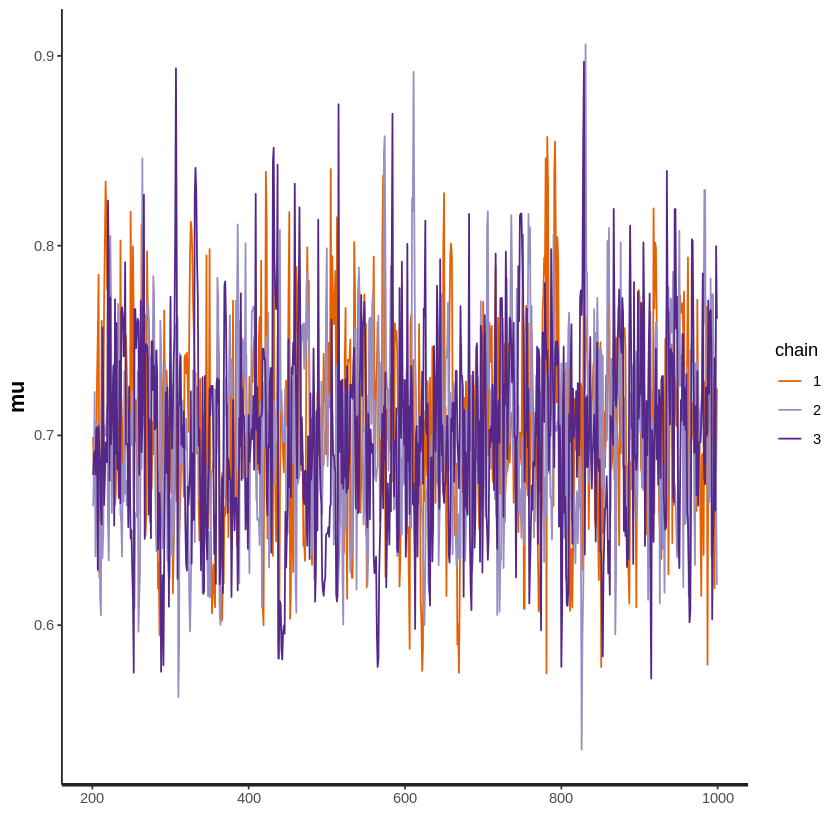

In [9]:
data2 = list(y = y2 , N = length(y2))

model2 = stan_model(model_code=model.string)
fit2 = sampling(object=model2 , data=data2 , chains=3 , iter=1000 , warmup=200 , thin=1, refresh = 0)

rstan::traceplot(fit2 ,pars=c("mu"))

mcmc2 = mcmc.list(lapply(1:ncol(fit2), function(x) { mcmc(as.array(fit2)[,x ,]) }))
print(summary(mcmc2))


Iterations = 1:800
Thinning interval = 1 
Number of chains = 3 
Sample size per chain = 800 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

          Mean     SD Naive SE Time-series SE
mu      0.6135 0.0549 0.001121       0.001926
lp__ -183.0413 0.6962 0.014212       0.021718

2. Quantiles for each variable:

          2.5%       25%       50%       75%     97.5%
mu      0.5122    0.5758    0.6113    0.6488    0.7266
lp__ -184.9190 -183.2149 -182.7682 -182.5997 -182.5508



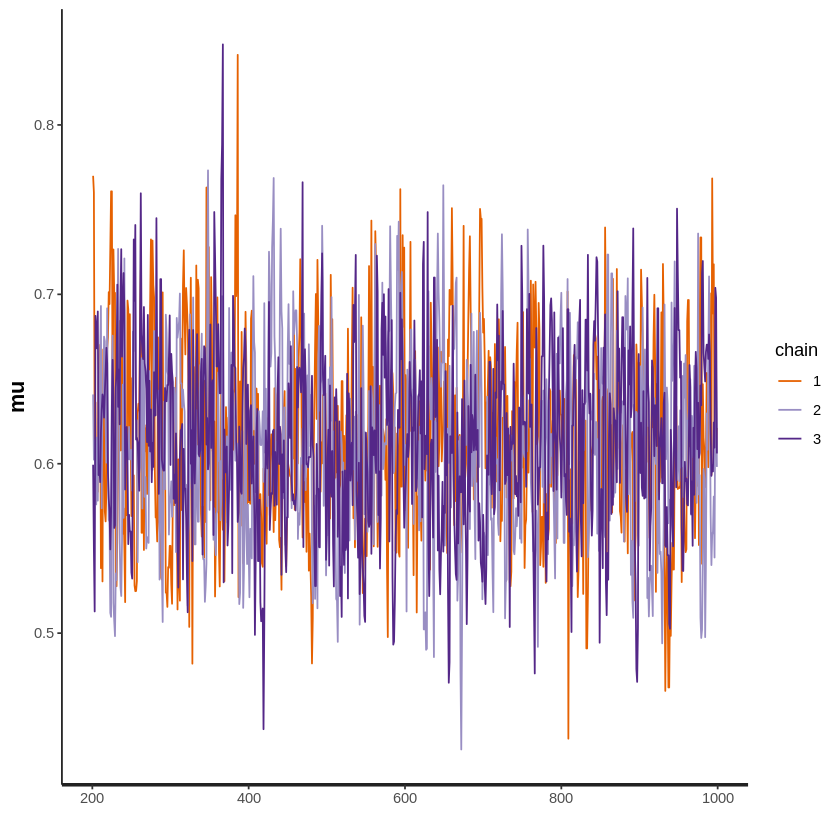

In [10]:
model.string = "
data {
  int<lower=0> N;  
  int<lower=0> y[N];  
}
parameters {
  real<lower=0> mu;  
}
model {
    mu ~ gamma(0.5,0.0001);
    y ~ poisson(mu);
}
"

model1 = stan_model(model_code=model.string)
fit1 = sampling(object=model1 , data=data1 , chains=3 , iter=1000 , warmup=200 , thin=1, refresh=0)

rstan::traceplot(fit1 ,pars=c("mu"))

mcmc1 = mcmc.list(lapply(1:ncol(fit1), function(x) { mcmc(as.array(fit1)[,x ,]) }))
print(summary(mcmc1))


Iterations = 1:800
Thinning interval = 1 
Number of chains = 3 
Sample size per chain = 800 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

          Mean      SD Naive SE Time-series SE
mu      0.7018 0.05048 0.001031       0.001779
lp__ -266.5967 0.76047 0.015523       0.025076

2. Quantiles for each variable:

          2.5%       25%       50%       75%     97.5%
mu      0.6034    0.6675    0.7008    0.7352    0.8035
lp__ -268.7561 -266.7408 -266.3177 -266.1413 -266.0869



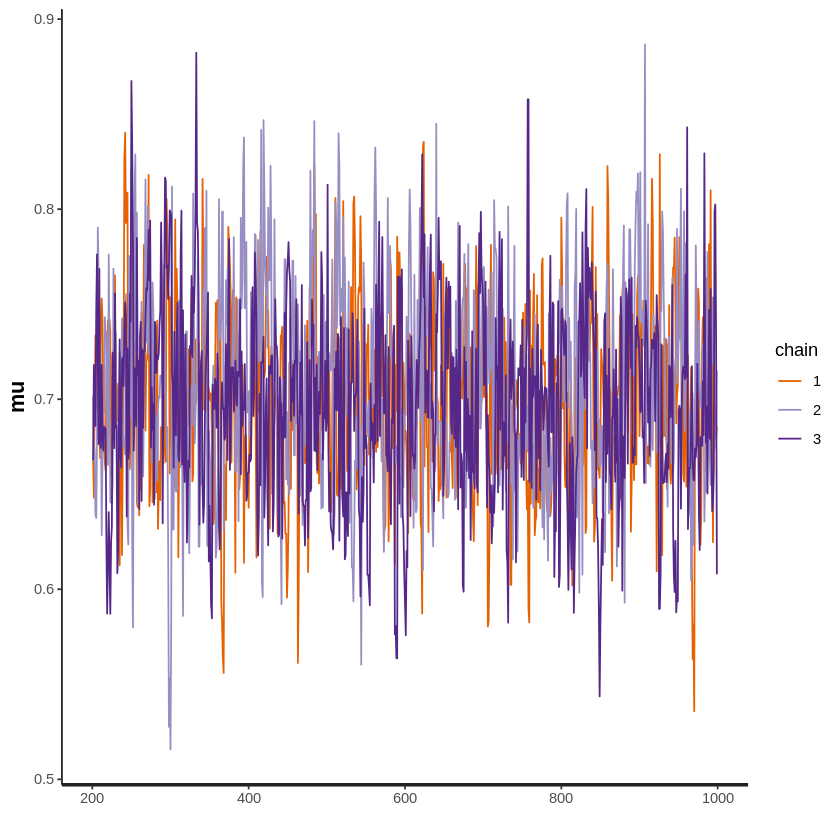

In [11]:
model2 = stan_model(model_code=model.string)
fit2 = sampling(object=model2 , data=data2 , chains=3 , iter=1000 , warmup=200 , thin=1, refresh = 0)

rstan::traceplot(fit2 ,pars=c("mu"))

mcmc2 = mcmc.list(lapply(1:ncol(fit2), function(x) { mcmc(as.array(fit2)[,x ,]) }))
print(summary(mcmc2))

## Esercizio 3

A study on water quality of streams defined a high level of bacter X as a level greater than 100 per 100 ml of stream water. n = 116 samples were taken from streams having a high environmental impact on pandas. Out of these, y = 11 had a high bacter X level.

Indicating with p the probability that a sample of water taken from the stream has a high bacter X level,
  
1) Find the frequentist estimator for p:

The frequentist estimator for a Binomial distribution is defined as $\hat{p} = \frac{y}{n}.$

In [12]:
y = 11
n = 116
p.hat =y/n
cat(sprintf("Frequentist estimator: %.3f", p.hat))

Frequentist estimator: 0.095

2) Using a Beta(1, 10) prior for p, calculate the posterior distribution P(p|y):

We assume as prior a beta distribution, the posterior is then another beta distribution with parameters $\alpha = \alpha_{p}+y$ and $\beta = \beta_{p}+n$, with y number of observed events and n total number of observations.

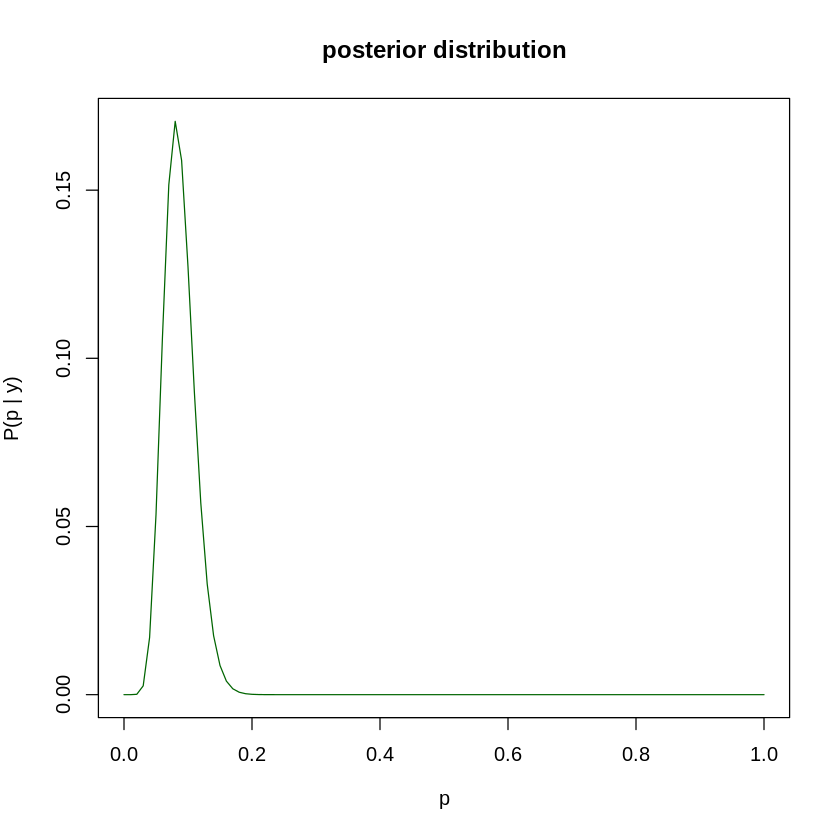

In [13]:
alpha = 1+y
beta = 10+n
p = seq(0,1,by=0.01)

p.star = dbeta(p, alpha, beta)
p.post = p.star / sum(p.star)
plot(p, p.post, type = "l", main = "posterior distribution", xlab = expression(p), 
     ylab = expression(paste("P(", p, " | ", y, ")")), col='dark green')

3) Find the bayesian estimator for p, the posterior mean and variance, and a 95% credible interval:

In [14]:
mean = alpha / (alpha+beta)
var = alpha * beta / ((alpha+beta)^2*(alpha+beta+1))
CI = qbeta(c(0.025, 0.975), alpha, beta)

cat(sprintf(" Mean: %.3f, Variance: %.4f \n", mean, var))
cat(" 95% Credibility Interval: (", CI[1], ",", CI[2], ")")

 Mean: 0.087, Variance: 0.0006 
 95% Credibility Interval: ( 0.04608116 , 0.1391226 )

4) Test the hypothesis $H_0$: p = 0.1 versus $H_1$: p ≠ 0.1 at 5% level of significance with both the frequentist and bayesian approach.

a) Frequentist approach: 

The null distribution is a binomial distribution with n=116, y=11, and p=0.1. Let's calulate the p-value.

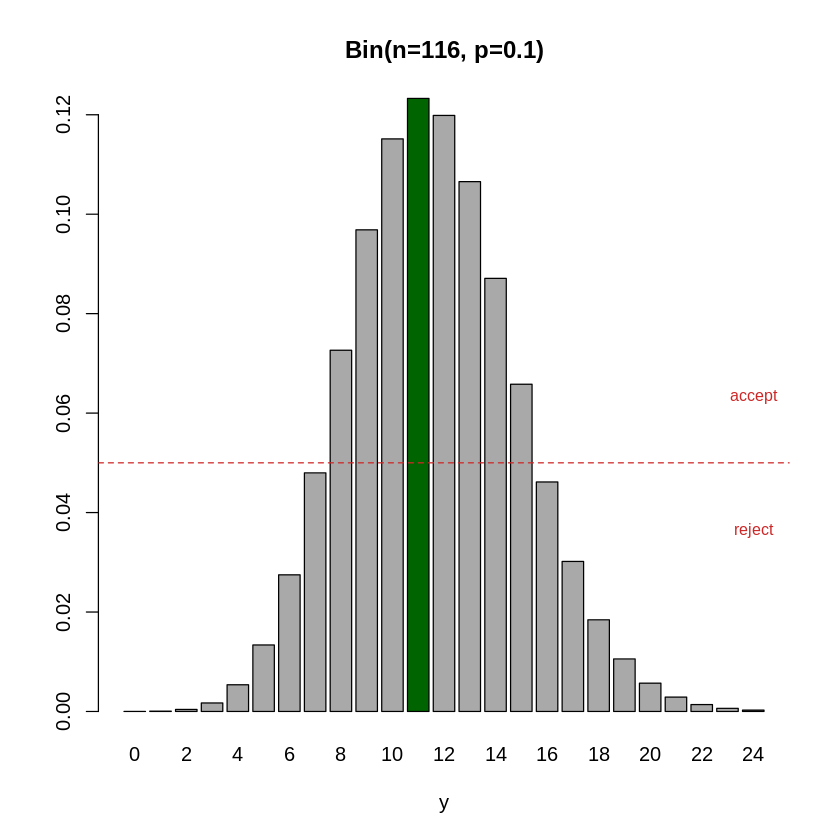

In [15]:
y.values = 0:24  
p0 = 0.1 
sig = 0.05  

colors = ifelse(y.values == y, "darkgreen", "darkgrey")
bar.positions = barplot(dbinom(y.values, n, p0), names.arg=y.values, xlab="y", main="Bin(n=116, p=0.1)", col=colors, border="black")
abline(h=sig, col='firebrick3', lty=2)

text(x = max(bar.positions), y = sig + 0.01, labels = "accept", pos = 3, col = "firebrick3", cex = 0.8)
text(x = max(bar.positions), y = sig - 0.01, labels = "reject", pos = 1, col = "firebrick3", cex = 0.8)

b) Bayesian approach:

In [16]:
if (p0 >= CI[1] && p0 <= CI[2]) {
  cat("We cannot reject the null hypotesis.\n")
} else {
  cat("We reject the null hypotesis.\n")
}

We cannot reject the null hypotesis.


A new measurement, performed one month later on n = 165 water samples, gives y = 9 high bacter X level.

5) Find the frequentist estimator for p:

In [17]:
y.new = 9
n.new = 165
p.hat = y.new/n.new
cat(sprintf("Frequentist estimator: %.3f", p.hat))

Frequentist estimator: 0.055

6) Find a bayesian estimator for p, assuming:
 
a) a Beta(1, 10) prior for p:

In [18]:
alpha.new = 1+y.new
beta.new = 10+n.new

mean = alpha.new / (alpha.new+beta.new)
var = alpha.new * beta.new / ((alpha.new+beta.new)^2*(alpha.new+beta.new+1))
CI = qbeta(c(0.025, 0.975), alpha.new, beta.new)

cat(sprintf(" Bayesian estimator - Mean: %.3f, Variance: %.4f \n", mean, var))
cat(" 95% Credibility Interval: (", CI[1], ",", CI[2], ")")

 Bayesian estimator - Mean: 0.054, Variance: 0.0003 
 95% Credibility Interval: ( 0.02636635 , 0.09081901 )

b) the posterior probability of the older measurement as the prior for the new one:

In [19]:
p.prior = dbeta(p, alpha, beta) 
p.star = p.prior * dbinom(y.new, n.new, p)
p.post = p.star/sum(p.star)

mean = sum(p*p.post)
var = sum(p^2*p.post) - mean^2

cdf = cumsum(p.post)
p.low = p[which.min(abs(cdf - 0.025))]
p.high = p[which.min(abs(cdf - 0.975))]

cat(sprintf(" Bayesian estimator - Mean: %.3f, Variance: %.4f \n", mean, var))
cat(" 95% Credibility Interval: (", p.low, ",", p.high, ")")

 Bayesian estimator - Mean: 0.069, Variance: 0.0002 
 95% Credibility Interval: ( 0.04 , 0.1 )

8) Test the hypothesis H₀: p = 0.1 versus H₁: p ≠ 0.1 at 5% level of significance with both the frequentist and bayesian approach.

a) Frequentist approach:

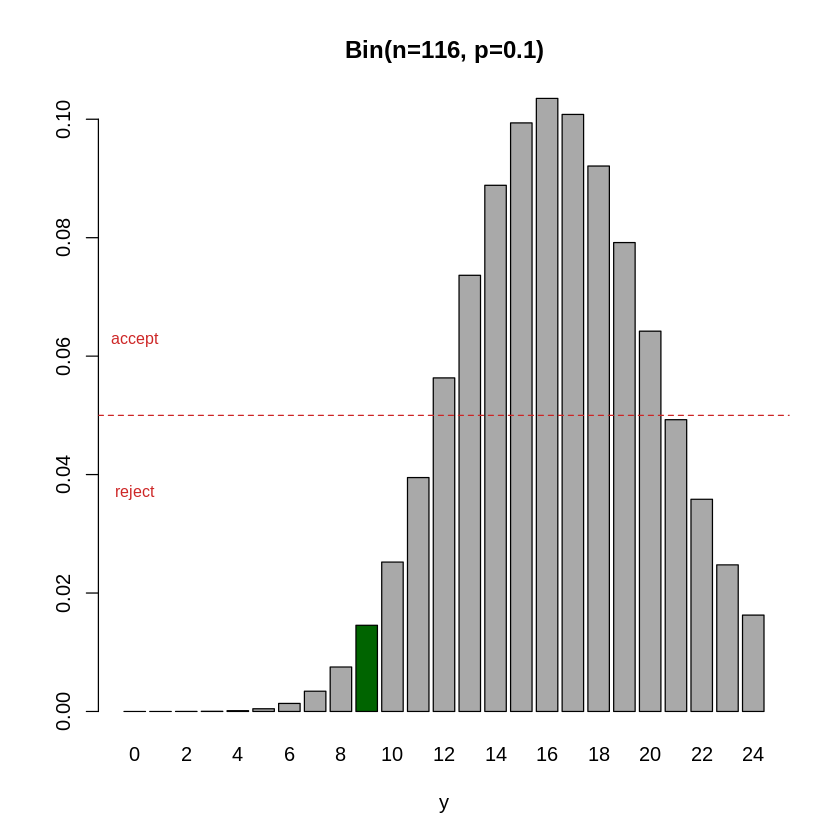

In [20]:
y.values = 0:24  
p0 = 0.1 
sig = 0.05  

colors = ifelse(y.values == y.new, "darkgreen", "darkgrey")
bar.positions = barplot(dbinom(y.values, n.new, p0), names.arg=y.values, xlab="y", main="Bin(n=116, p=0.1)", col=colors, border="black")
abline(h=sig, col='firebrick3', lty=2)

text(x = min(bar.positions), y = sig + 0.01, labels = "accept", pos = 3, col = "firebrick3", cex = 0.8)
text(x = min(bar.positions), y = sig - 0.01, labels = "reject", pos = 1, col = "firebrick3", cex = 0.8)

We can reject the null hypotesis $H_0$.

b) Bayesian approach:

In [21]:
if (p0 >= CI[1] && p0 <= CI[2]) {
  cat("We cannot reject the null hypotesis.\n")
} else {
  cat("We reject the null hypotesis.\n")
}

We reject the null hypotesis.


## Esercizio 4

Analyze the data of Exercise 3 and solve points (2) and (3) using a Markov Chain Monte Carlo using stan.

In [22]:
model.string = "
data {
  int<lower=0> y;   
  int<lower=0> n;   
  real<lower=0> alphap;  
  real<lower=0> betap;   
}

parameters {
  real<lower=0, upper=1> p; 
}

model {
  p ~ beta(alphap, betap);
  y ~ binomial(n, p);
}
"


Iterations = 1:800
Thinning interval = 1 
Number of chains = 3 
Sample size per chain = 800 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

          Mean      SD  Naive SE Time-series SE
p      0.09518 0.02606 0.0005319      0.0009031
lp__ -40.22707 0.68375 0.0139569      0.0210695

2. Quantiles for each variable:

         2.5%       25%       50%      75%   97.5%
p      0.0514   0.07592   0.09217   0.1112   0.153
lp__ -42.3170 -40.39480 -39.96374 -39.7789 -39.726



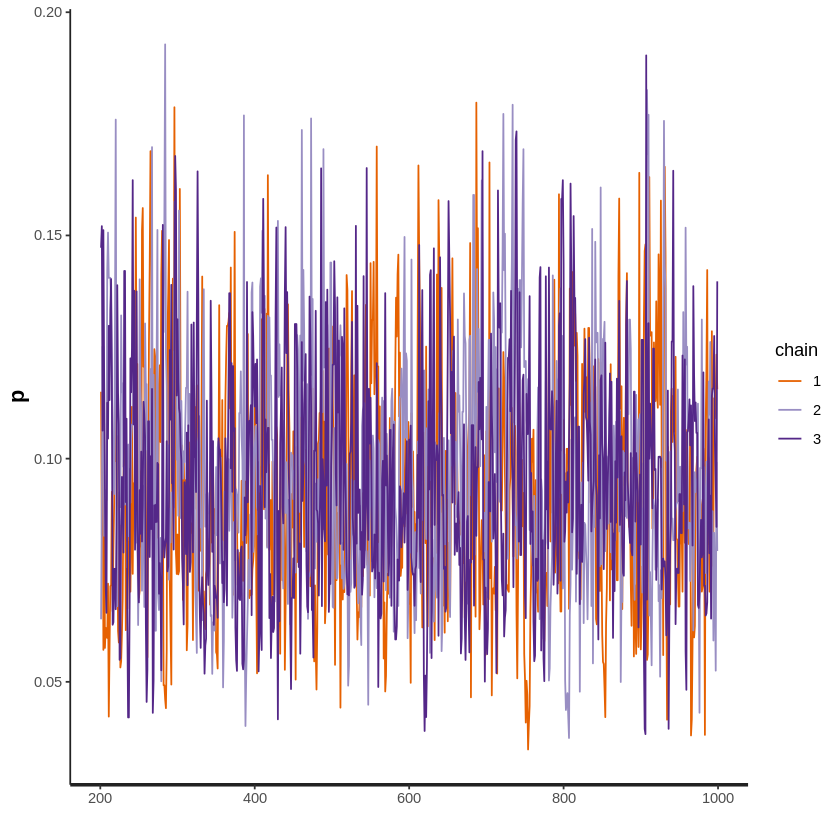

In [23]:
data = list(y = 11, n = 116, alphap = 1, betap = 10)

model = stan_model(model_code=model.string)
fit = sampling(object=model , data=data , chains=3 , iter=1000 , warmup=200 , thin=1, refresh=0)

rstan::traceplot(fit ,pars=c("p"))

mcmc = mcmc.list(lapply(1:ncol(fit), function(x) { mcmc(as.array(fit)[,x ,]) }))
print(summary(mcmc))